# MNIST

Handwritten digits between 0-9

# GAN

Genrative Adversarial Networks

# PyTorch

Deep Learning Framework

In [1]:
import torch
from torch import nn

# Model

In [3]:
class Discriminator(nn.Module):
    def __init__(self, num_features=784):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, input_vectors):
        return self.discriminator(input_vectors)

In [5]:
class Generator(nn.Module):
    def __init__(self, num_features=784):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, num_features),
            nn.Tanh()
        )
    def forward(self, input_vectors):
        return self.generator(input_vectors)

# Training

In [16]:
import time
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# Hyper-parameters
latent_size = 128
hidden_size = 256
image_size = 784
num_epochs = 300
batch_size = 32
sample_dir = 'samples'
save_dir = 'save'

In [33]:
start_time = time.time()
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))

In [34]:
# Discriminator Loss => BCELoss
def d_loss_function(inputs, targets):
    return nn.BCELoss()(inputs, targets)


def g_loss_function(inputs):
    targets = torch.ones([inputs.shape[0], 1])
    targets = targets.to(device)
    return nn.BCELoss()(inputs, targets)

In [35]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cuda:0


In [36]:
# Model
G = Generator().to(device)
D = Discriminator().to(device)
print(G)
print(D)

Generator(
  (generator): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
Discriminator(
  (discriminator): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [37]:
# Settings
epochs = 200
lr = 0.0002
batch_size = 64
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

In [38]:

# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [39]:
# Load data
train_set = datasets.MNIST('mnist/', train=True, download=True, transform=transform)
test_set = datasets.MNIST('mnist/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


0it [00:00, ?it/s]

Extracting mnist/MNIST\raw\train-images-idx3-ubyte.gz to mnist/MNIST\raw


0it [00:00, ?it/s]

Extracting mnist/MNIST\raw\train-labels-idx1-ubyte.gz to mnist/MNIST\raw


0it [00:00, ?it/s]

Extracting mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to mnist/MNIST\raw


0it [00:00, ?it/s]

Extracting mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist/MNIST\raw
Processing...
Done!


[1/200, 100/938] D_loss: 0.655 G_loss: 0.904
[1/200, 200/938] D_loss: 0.661 G_loss: 0.782
[1/200, 300/938] D_loss: 0.625 G_loss: 0.786
[1/200, 400/938] D_loss: 0.607 G_loss: 1.094
[1/200, 500/938] D_loss: 0.654 G_loss: 0.833
[1/200, 600/938] D_loss: 0.566 G_loss: 0.950
[1/200, 700/938] D_loss: 0.679 G_loss: 1.094
[1/200, 800/938] D_loss: 0.436 G_loss: 1.404
[1/200, 900/938] D_loss: 0.559 G_loss: 2.071
[1/200, 938/938] D_loss: 0.687 G_loss: 2.351


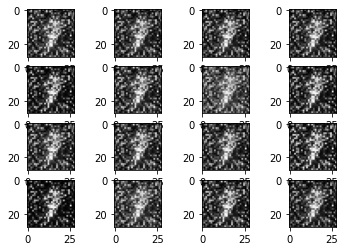

[2/200, 100/938] D_loss: 0.349 G_loss: 1.518
[2/200, 200/938] D_loss: 0.662 G_loss: 2.219
[2/200, 300/938] D_loss: 0.499 G_loss: 3.399
[2/200, 400/938] D_loss: 0.241 G_loss: 2.792
[2/200, 500/938] D_loss: 0.306 G_loss: 1.814
[2/200, 600/938] D_loss: 0.407 G_loss: 1.453
[2/200, 700/938] D_loss: 0.236 G_loss: 2.626
[2/200, 800/938] D_loss: 0.209 G_loss: 2.755
[2/200, 900/938] D_loss: 0.383 G_loss: 2.432
[2/200, 938/938] D_loss: 0.295 G_loss: 2.409


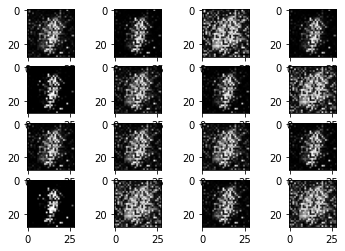

[3/200, 100/938] D_loss: 0.165 G_loss: 2.791
[3/200, 200/938] D_loss: 0.333 G_loss: 2.300
[3/200, 300/938] D_loss: 0.313 G_loss: 2.490
[3/200, 400/938] D_loss: 0.383 G_loss: 1.746
[3/200, 500/938] D_loss: 0.388 G_loss: 1.263
[3/200, 600/938] D_loss: 0.364 G_loss: 1.890
[3/200, 700/938] D_loss: 0.249 G_loss: 2.549
[3/200, 800/938] D_loss: 0.303 G_loss: 2.687
[3/200, 900/938] D_loss: 0.326 G_loss: 2.432
[3/200, 938/938] D_loss: 0.349 G_loss: 2.472


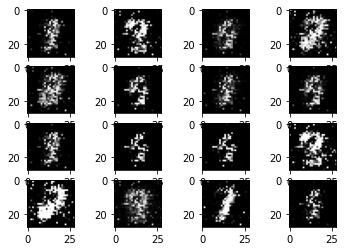

[4/200, 100/938] D_loss: 0.333 G_loss: 2.134
[4/200, 200/938] D_loss: 0.351 G_loss: 1.284
[4/200, 300/938] D_loss: 0.358 G_loss: 2.446
[4/200, 400/938] D_loss: 0.433 G_loss: 1.717
[4/200, 500/938] D_loss: 0.273 G_loss: 2.228
[4/200, 600/938] D_loss: 0.432 G_loss: 2.175
[4/200, 700/938] D_loss: 0.378 G_loss: 2.989
[4/200, 800/938] D_loss: 0.398 G_loss: 1.909
[4/200, 900/938] D_loss: 0.390 G_loss: 2.432
[4/200, 938/938] D_loss: 0.522 G_loss: 0.915


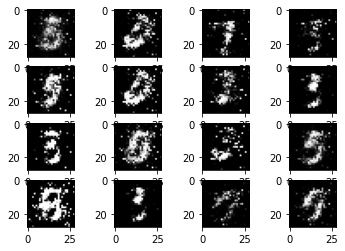

[5/200, 100/938] D_loss: 0.442 G_loss: 1.934
[5/200, 200/938] D_loss: 0.352 G_loss: 1.724
[5/200, 300/938] D_loss: 0.444 G_loss: 2.538
[5/200, 400/938] D_loss: 0.381 G_loss: 1.531
[5/200, 500/938] D_loss: 0.511 G_loss: 2.444
[5/200, 600/938] D_loss: 0.409 G_loss: 2.298
[5/200, 700/938] D_loss: 0.451 G_loss: 1.903
[5/200, 800/938] D_loss: 0.425 G_loss: 1.495
[5/200, 900/938] D_loss: 0.482 G_loss: 1.799
[5/200, 938/938] D_loss: 0.383 G_loss: 2.020


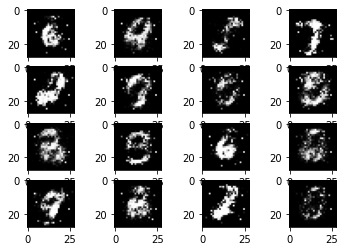

[6/200, 100/938] D_loss: 0.535 G_loss: 2.173
[6/200, 200/938] D_loss: 0.530 G_loss: 1.255
[6/200, 300/938] D_loss: 0.475 G_loss: 1.028
[6/200, 400/938] D_loss: 0.496 G_loss: 1.220
[6/200, 500/938] D_loss: 0.502 G_loss: 0.688
[6/200, 600/938] D_loss: 0.418 G_loss: 1.412
[6/200, 700/938] D_loss: 0.728 G_loss: 1.100
[6/200, 800/938] D_loss: 0.574 G_loss: 0.980
[6/200, 900/938] D_loss: 0.350 G_loss: 1.884
[6/200, 938/938] D_loss: 0.369 G_loss: 1.940


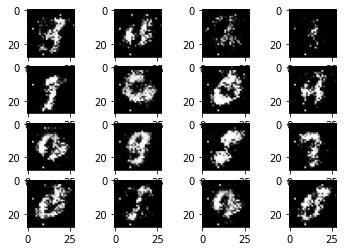

[7/200, 100/938] D_loss: 0.486 G_loss: 1.711
[7/200, 200/938] D_loss: 0.427 G_loss: 1.854
[7/200, 300/938] D_loss: 0.425 G_loss: 2.302
[7/200, 400/938] D_loss: 0.478 G_loss: 1.228
[7/200, 500/938] D_loss: 0.507 G_loss: 2.520
[7/200, 600/938] D_loss: 0.596 G_loss: 0.817
[7/200, 700/938] D_loss: 0.432 G_loss: 2.243
[7/200, 800/938] D_loss: 0.404 G_loss: 2.505
[7/200, 900/938] D_loss: 0.551 G_loss: 0.870
[7/200, 938/938] D_loss: 0.560 G_loss: 1.015


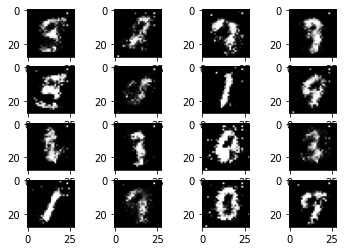

[8/200, 100/938] D_loss: 0.509 G_loss: 1.943
[8/200, 200/938] D_loss: 0.399 G_loss: 1.379
[8/200, 300/938] D_loss: 0.839 G_loss: 0.539
[8/200, 400/938] D_loss: 0.533 G_loss: 0.690
[8/200, 500/938] D_loss: 0.490 G_loss: 1.245
[8/200, 600/938] D_loss: 0.678 G_loss: 0.746
[8/200, 700/938] D_loss: 0.601 G_loss: 0.812
[8/200, 800/938] D_loss: 0.594 G_loss: 1.189
[8/200, 900/938] D_loss: 0.519 G_loss: 0.972
[8/200, 938/938] D_loss: 0.485 G_loss: 1.780


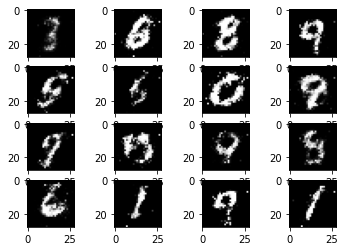

[9/200, 100/938] D_loss: 0.502 G_loss: 1.431
[9/200, 200/938] D_loss: 0.590 G_loss: 0.989
[9/200, 300/938] D_loss: 0.537 G_loss: 0.972
[9/200, 400/938] D_loss: 0.553 G_loss: 1.115
[9/200, 500/938] D_loss: 0.618 G_loss: 0.782
[9/200, 600/938] D_loss: 0.702 G_loss: 0.624
[9/200, 700/938] D_loss: 0.507 G_loss: 1.323
[9/200, 800/938] D_loss: 0.575 G_loss: 1.159
[9/200, 900/938] D_loss: 0.511 G_loss: 1.269
[9/200, 938/938] D_loss: 0.545 G_loss: 1.351


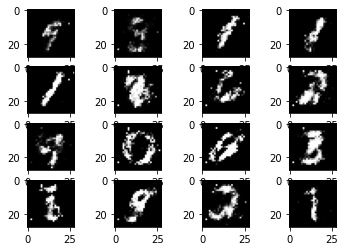

[10/200, 100/938] D_loss: 0.564 G_loss: 1.080
[10/200, 200/938] D_loss: 0.423 G_loss: 1.886
[10/200, 300/938] D_loss: 0.627 G_loss: 0.830
[10/200, 400/938] D_loss: 0.683 G_loss: 1.348
[10/200, 500/938] D_loss: 0.619 G_loss: 1.550
[10/200, 600/938] D_loss: 0.498 G_loss: 1.300
[10/200, 700/938] D_loss: 0.582 G_loss: 1.339
[10/200, 800/938] D_loss: 0.527 G_loss: 1.269
[10/200, 900/938] D_loss: 0.541 G_loss: 0.781
[10/200, 938/938] D_loss: 0.639 G_loss: 1.523


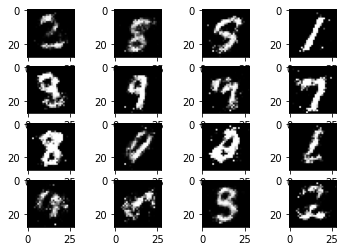

[11/200, 100/938] D_loss: 0.621 G_loss: 0.644
[11/200, 200/938] D_loss: 0.689 G_loss: 1.075
[11/200, 300/938] D_loss: 0.605 G_loss: 1.302
[11/200, 400/938] D_loss: 0.450 G_loss: 1.157
[11/200, 500/938] D_loss: 0.491 G_loss: 1.088
[11/200, 600/938] D_loss: 0.498 G_loss: 1.575
[11/200, 700/938] D_loss: 0.601 G_loss: 1.227
[11/200, 800/938] D_loss: 0.602 G_loss: 0.952
[11/200, 900/938] D_loss: 0.525 G_loss: 1.014
[11/200, 938/938] D_loss: 0.553 G_loss: 1.960


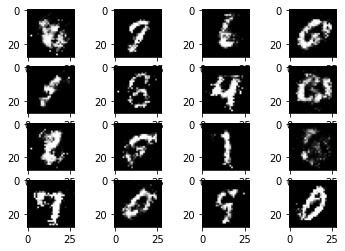

[12/200, 100/938] D_loss: 0.653 G_loss: 0.506
[12/200, 200/938] D_loss: 0.459 G_loss: 1.259
[12/200, 300/938] D_loss: 0.613 G_loss: 0.980
[12/200, 400/938] D_loss: 0.600 G_loss: 0.762
[12/200, 500/938] D_loss: 0.502 G_loss: 1.790
[12/200, 600/938] D_loss: 0.653 G_loss: 1.598
[12/200, 700/938] D_loss: 0.684 G_loss: 0.862
[12/200, 800/938] D_loss: 0.711 G_loss: 0.674
[12/200, 900/938] D_loss: 0.471 G_loss: 1.029
[12/200, 938/938] D_loss: 0.568 G_loss: 1.000


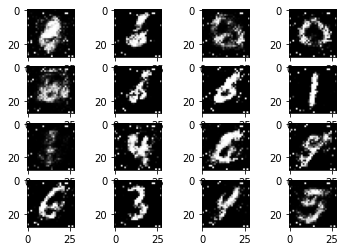

[13/200, 100/938] D_loss: 0.611 G_loss: 1.018
[13/200, 200/938] D_loss: 0.646 G_loss: 1.303
[13/200, 300/938] D_loss: 0.301 G_loss: 5.898
[13/200, 400/938] D_loss: 0.488 G_loss: 2.758
[13/200, 500/938] D_loss: 0.572 G_loss: 1.300
[13/200, 600/938] D_loss: 0.636 G_loss: 0.744
[13/200, 700/938] D_loss: 0.587 G_loss: 0.959
[13/200, 800/938] D_loss: 0.536 G_loss: 1.124
[13/200, 900/938] D_loss: 0.578 G_loss: 0.831
[13/200, 938/938] D_loss: 0.701 G_loss: 1.468


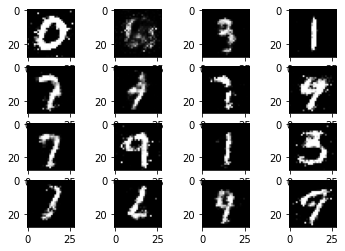

[14/200, 100/938] D_loss: 0.554 G_loss: 1.120
[14/200, 200/938] D_loss: 0.565 G_loss: 1.145
[14/200, 300/938] D_loss: 0.629 G_loss: 1.107
[14/200, 400/938] D_loss: 0.579 G_loss: 0.977
[14/200, 500/938] D_loss: 0.615 G_loss: 0.708
[14/200, 600/938] D_loss: 0.586 G_loss: 1.031
[14/200, 700/938] D_loss: 0.600 G_loss: 0.966
[14/200, 800/938] D_loss: 0.628 G_loss: 1.080
[14/200, 900/938] D_loss: 0.603 G_loss: 1.137
[14/200, 938/938] D_loss: 0.586 G_loss: 0.805


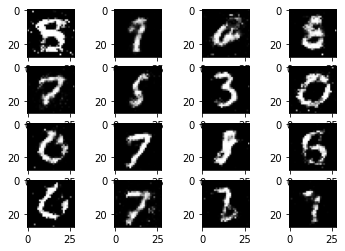

[15/200, 100/938] D_loss: 0.650 G_loss: 0.585
[15/200, 200/938] D_loss: 0.590 G_loss: 0.617
[15/200, 300/938] D_loss: 0.728 G_loss: 0.434
[15/200, 400/938] D_loss: 0.542 G_loss: 1.140
[15/200, 500/938] D_loss: 0.571 G_loss: 0.923
[15/200, 600/938] D_loss: 0.590 G_loss: 0.886
[15/200, 700/938] D_loss: 0.631 G_loss: 0.747
[15/200, 800/938] D_loss: 0.613 G_loss: 0.959
[15/200, 900/938] D_loss: 0.639 G_loss: 1.223
[15/200, 938/938] D_loss: 0.568 G_loss: 1.025


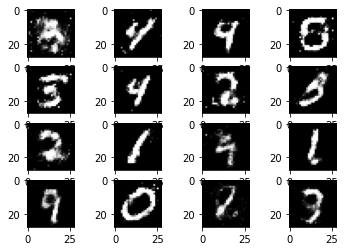

[16/200, 100/938] D_loss: 0.580 G_loss: 0.849
[16/200, 200/938] D_loss: 0.591 G_loss: 1.021
[16/200, 300/938] D_loss: 0.626 G_loss: 0.917
[16/200, 400/938] D_loss: 0.592 G_loss: 1.060
[16/200, 500/938] D_loss: 0.588 G_loss: 0.738
[16/200, 600/938] D_loss: 0.622 G_loss: 1.349
[16/200, 700/938] D_loss: 0.664 G_loss: 0.775
[16/200, 800/938] D_loss: 0.637 G_loss: 0.797
[16/200, 900/938] D_loss: 0.613 G_loss: 1.111
[16/200, 938/938] D_loss: 0.635 G_loss: 0.460


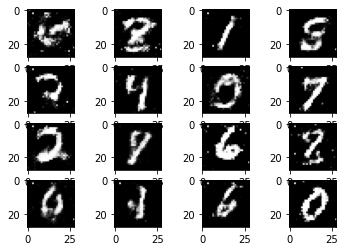

[17/200, 100/938] D_loss: 0.635 G_loss: 1.240
[17/200, 200/938] D_loss: 0.636 G_loss: 0.846
[17/200, 300/938] D_loss: 0.634 G_loss: 0.769
[17/200, 400/938] D_loss: 0.606 G_loss: 1.116
[17/200, 500/938] D_loss: 0.616 G_loss: 0.818
[17/200, 600/938] D_loss: 0.605 G_loss: 1.012
[17/200, 700/938] D_loss: 0.625 G_loss: 0.967
[17/200, 800/938] D_loss: 0.706 G_loss: 0.769
[17/200, 900/938] D_loss: 0.622 G_loss: 0.884
[17/200, 938/938] D_loss: 0.692 G_loss: 1.213


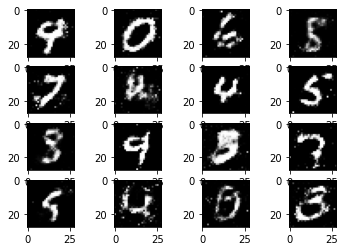

[18/200, 100/938] D_loss: 0.645 G_loss: 0.715
[18/200, 200/938] D_loss: 0.571 G_loss: 0.889
[18/200, 300/938] D_loss: 0.634 G_loss: 0.685
[18/200, 400/938] D_loss: 0.615 G_loss: 0.873
[18/200, 500/938] D_loss: 0.602 G_loss: 0.988
[18/200, 600/938] D_loss: 0.598 G_loss: 0.990
[18/200, 700/938] D_loss: 0.597 G_loss: 1.113
[18/200, 800/938] D_loss: 0.625 G_loss: 0.998
[18/200, 900/938] D_loss: 0.626 G_loss: 0.813
[18/200, 938/938] D_loss: 0.650 G_loss: 1.072


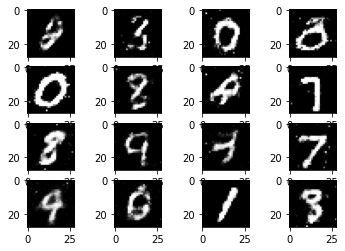

[19/200, 100/938] D_loss: 0.623 G_loss: 0.739
[19/200, 200/938] D_loss: 0.701 G_loss: 1.509
[19/200, 300/938] D_loss: 0.601 G_loss: 0.917
[19/200, 400/938] D_loss: 0.622 G_loss: 0.919
[19/200, 500/938] D_loss: 0.616 G_loss: 1.049
[19/200, 600/938] D_loss: 0.604 G_loss: 1.009
[19/200, 700/938] D_loss: 0.648 G_loss: 1.240
[19/200, 800/938] D_loss: 0.655 G_loss: 1.040
[19/200, 900/938] D_loss: 0.680 G_loss: 0.921
[19/200, 938/938] D_loss: 0.658 G_loss: 1.052


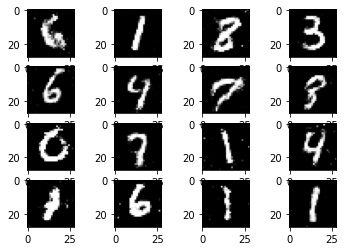

[20/200, 100/938] D_loss: 0.613 G_loss: 0.995
[20/200, 200/938] D_loss: 0.610 G_loss: 0.724
[20/200, 300/938] D_loss: 0.605 G_loss: 0.667
[20/200, 400/938] D_loss: 0.617 G_loss: 0.988
[20/200, 500/938] D_loss: 0.603 G_loss: 0.747
[20/200, 600/938] D_loss: 0.655 G_loss: 0.805
[20/200, 700/938] D_loss: 0.623 G_loss: 0.676
[20/200, 800/938] D_loss: 0.665 G_loss: 0.976
[20/200, 900/938] D_loss: 0.608 G_loss: 0.827
[20/200, 938/938] D_loss: 0.606 G_loss: 0.769


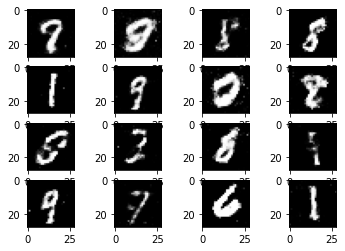

[21/200, 100/938] D_loss: 0.614 G_loss: 0.944
[21/200, 200/938] D_loss: 0.631 G_loss: 0.754
[21/200, 300/938] D_loss: 0.639 G_loss: 0.932
[21/200, 400/938] D_loss: 0.624 G_loss: 0.854
[21/200, 500/938] D_loss: 0.627 G_loss: 0.878
[21/200, 600/938] D_loss: 0.601 G_loss: 0.908
[21/200, 700/938] D_loss: 0.627 G_loss: 0.849
[21/200, 800/938] D_loss: 0.655 G_loss: 0.854
[21/200, 900/938] D_loss: 0.622 G_loss: 0.934
[21/200, 938/938] D_loss: 0.651 G_loss: 0.934


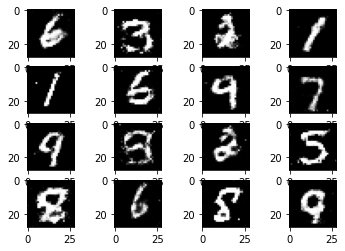

[22/200, 100/938] D_loss: 0.666 G_loss: 0.761
[22/200, 200/938] D_loss: 0.616 G_loss: 0.667
[22/200, 300/938] D_loss: 0.665 G_loss: 0.609
[22/200, 400/938] D_loss: 0.620 G_loss: 0.653
[22/200, 500/938] D_loss: 0.628 G_loss: 0.957
[22/200, 600/938] D_loss: 0.607 G_loss: 0.682
[22/200, 700/938] D_loss: 0.661 G_loss: 0.696
[22/200, 800/938] D_loss: 0.636 G_loss: 0.811
[22/200, 900/938] D_loss: 0.641 G_loss: 0.883
[22/200, 938/938] D_loss: 0.619 G_loss: 1.062


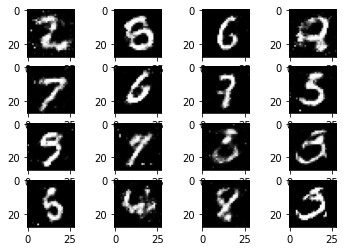

[23/200, 100/938] D_loss: 0.600 G_loss: 1.101
[23/200, 200/938] D_loss: 0.747 G_loss: 1.330
[23/200, 300/938] D_loss: 0.601 G_loss: 0.957
[23/200, 400/938] D_loss: 0.724 G_loss: 0.542
[23/200, 500/938] D_loss: 0.643 G_loss: 0.735
[23/200, 600/938] D_loss: 0.639 G_loss: 0.949
[23/200, 700/938] D_loss: 0.592 G_loss: 1.042
[23/200, 800/938] D_loss: 0.623 G_loss: 0.718
[23/200, 900/938] D_loss: 0.596 G_loss: 0.749
[23/200, 938/938] D_loss: 0.614 G_loss: 0.744


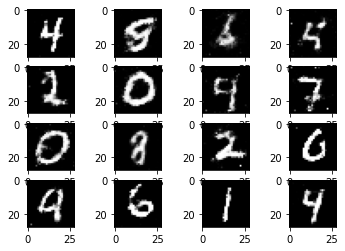

[24/200, 100/938] D_loss: 0.646 G_loss: 0.956
[24/200, 200/938] D_loss: 0.593 G_loss: 0.871
[24/200, 300/938] D_loss: 0.648 G_loss: 0.607
[24/200, 400/938] D_loss: 0.617 G_loss: 0.974
[24/200, 500/938] D_loss: 0.639 G_loss: 0.899
[24/200, 600/938] D_loss: 0.602 G_loss: 0.944
[24/200, 700/938] D_loss: 0.647 G_loss: 1.399
[24/200, 800/938] D_loss: 0.596 G_loss: 0.987
[24/200, 900/938] D_loss: 0.616 G_loss: 0.751
[24/200, 938/938] D_loss: 0.616 G_loss: 0.714


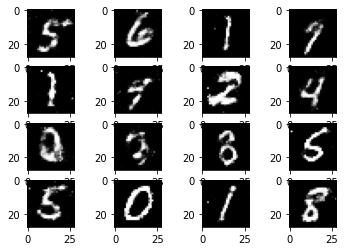

[25/200, 100/938] D_loss: 0.612 G_loss: 1.046
[25/200, 200/938] D_loss: 0.608 G_loss: 0.826
[25/200, 300/938] D_loss: 0.626 G_loss: 0.936
[25/200, 400/938] D_loss: 0.616 G_loss: 0.703
[25/200, 500/938] D_loss: 0.608 G_loss: 0.973
[25/200, 600/938] D_loss: 0.610 G_loss: 0.542
[25/200, 700/938] D_loss: 0.643 G_loss: 0.729
[25/200, 800/938] D_loss: 0.598 G_loss: 0.893
[25/200, 900/938] D_loss: 0.637 G_loss: 0.884
[25/200, 938/938] D_loss: 0.633 G_loss: 0.960


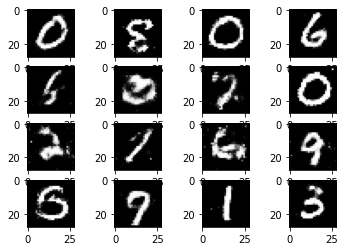

[26/200, 100/938] D_loss: 0.632 G_loss: 1.002
[26/200, 200/938] D_loss: 0.633 G_loss: 1.084
[26/200, 300/938] D_loss: 0.612 G_loss: 0.740
[26/200, 400/938] D_loss: 0.689 G_loss: 0.667
[26/200, 500/938] D_loss: 0.625 G_loss: 1.153
[26/200, 600/938] D_loss: 0.660 G_loss: 0.929
[26/200, 700/938] D_loss: 0.602 G_loss: 0.878
[26/200, 800/938] D_loss: 0.636 G_loss: 0.662
[26/200, 900/938] D_loss: 0.627 G_loss: 0.870
[26/200, 938/938] D_loss: 0.644 G_loss: 0.730


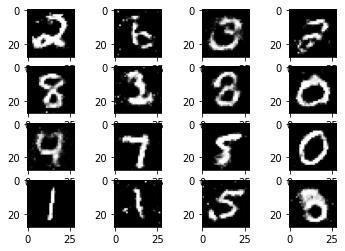

[27/200, 100/938] D_loss: 0.644 G_loss: 0.621
[27/200, 200/938] D_loss: 0.626 G_loss: 0.841
[27/200, 300/938] D_loss: 0.581 G_loss: 0.847
[27/200, 400/938] D_loss: 0.568 G_loss: 1.118
[27/200, 500/938] D_loss: 0.637 G_loss: 0.737
[27/200, 600/938] D_loss: 0.649 G_loss: 0.766
[27/200, 700/938] D_loss: 0.608 G_loss: 0.617
[27/200, 800/938] D_loss: 0.624 G_loss: 1.147
[27/200, 900/938] D_loss: 0.610 G_loss: 1.073
[27/200, 938/938] D_loss: 0.710 G_loss: 1.382


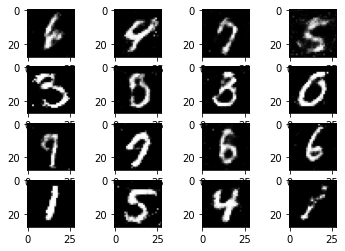

[28/200, 100/938] D_loss: 0.655 G_loss: 0.812
[28/200, 200/938] D_loss: 0.628 G_loss: 1.001
[28/200, 300/938] D_loss: 0.701 G_loss: 0.641
[28/200, 400/938] D_loss: 0.667 G_loss: 0.890
[28/200, 500/938] D_loss: 0.643 G_loss: 0.752
[28/200, 600/938] D_loss: 0.687 G_loss: 0.661
[28/200, 700/938] D_loss: 0.641 G_loss: 0.960
[28/200, 800/938] D_loss: 0.680 G_loss: 0.845
[28/200, 900/938] D_loss: 0.722 G_loss: 0.898
[28/200, 938/938] D_loss: 0.658 G_loss: 0.892


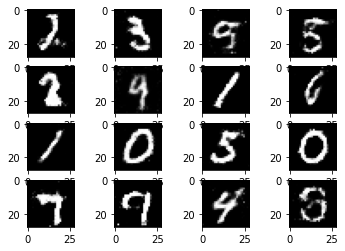

[29/200, 100/938] D_loss: 0.636 G_loss: 0.950
[29/200, 200/938] D_loss: 0.635 G_loss: 0.902
[29/200, 300/938] D_loss: 0.672 G_loss: 0.861
[29/200, 400/938] D_loss: 0.566 G_loss: 0.818
[29/200, 500/938] D_loss: 0.589 G_loss: 0.930
[29/200, 600/938] D_loss: 0.704 G_loss: 0.959
[29/200, 700/938] D_loss: 0.595 G_loss: 0.768
[29/200, 800/938] D_loss: 0.641 G_loss: 0.890
[29/200, 900/938] D_loss: 0.622 G_loss: 0.953
[29/200, 938/938] D_loss: 0.609 G_loss: 1.081


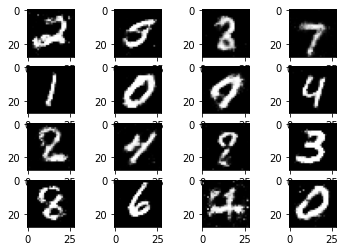

[30/200, 100/938] D_loss: 0.666 G_loss: 0.769
[30/200, 200/938] D_loss: 0.653 G_loss: 0.808
[30/200, 300/938] D_loss: 0.584 G_loss: 0.778
[30/200, 400/938] D_loss: 0.625 G_loss: 0.864
[30/200, 500/938] D_loss: 0.652 G_loss: 0.886
[30/200, 600/938] D_loss: 0.634 G_loss: 0.776
[30/200, 700/938] D_loss: 0.625 G_loss: 1.099
[30/200, 800/938] D_loss: 0.647 G_loss: 0.830
[30/200, 900/938] D_loss: 0.643 G_loss: 0.838
[30/200, 938/938] D_loss: 0.615 G_loss: 0.614


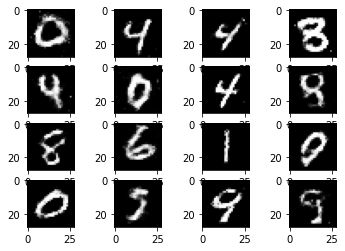

[31/200, 100/938] D_loss: 0.642 G_loss: 0.710
[31/200, 200/938] D_loss: 0.700 G_loss: 1.264
[31/200, 300/938] D_loss: 0.632 G_loss: 0.943
[31/200, 400/938] D_loss: 0.605 G_loss: 1.017
[31/200, 500/938] D_loss: 0.658 G_loss: 0.847
[31/200, 600/938] D_loss: 0.630 G_loss: 1.006
[31/200, 700/938] D_loss: 0.627 G_loss: 0.967
[31/200, 800/938] D_loss: 0.700 G_loss: 0.948
[31/200, 900/938] D_loss: 0.614 G_loss: 0.976
[31/200, 938/938] D_loss: 0.673 G_loss: 0.650


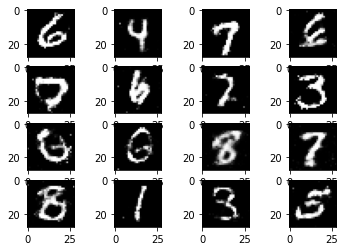

[32/200, 100/938] D_loss: 0.627 G_loss: 0.939
[32/200, 200/938] D_loss: 0.630 G_loss: 1.104
[32/200, 300/938] D_loss: 0.635 G_loss: 0.698
[32/200, 400/938] D_loss: 0.641 G_loss: 0.821
[32/200, 500/938] D_loss: 0.654 G_loss: 0.664
[32/200, 600/938] D_loss: 0.652 G_loss: 0.882
[32/200, 700/938] D_loss: 0.609 G_loss: 1.006
[32/200, 800/938] D_loss: 0.607 G_loss: 0.962
[32/200, 900/938] D_loss: 0.661 G_loss: 0.884
[32/200, 938/938] D_loss: 0.580 G_loss: 0.943


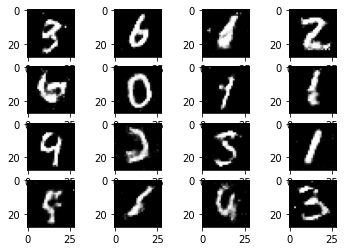

[33/200, 100/938] D_loss: 0.637 G_loss: 0.802
[33/200, 200/938] D_loss: 0.637 G_loss: 0.829
[33/200, 300/938] D_loss: 0.638 G_loss: 0.875
[33/200, 400/938] D_loss: 0.648 G_loss: 0.924
[33/200, 500/938] D_loss: 0.597 G_loss: 0.691
[33/200, 600/938] D_loss: 0.680 G_loss: 0.776
[33/200, 700/938] D_loss: 0.676 G_loss: 0.604
[33/200, 800/938] D_loss: 0.621 G_loss: 0.678
[33/200, 900/938] D_loss: 0.610 G_loss: 0.802
[33/200, 938/938] D_loss: 0.658 G_loss: 0.932


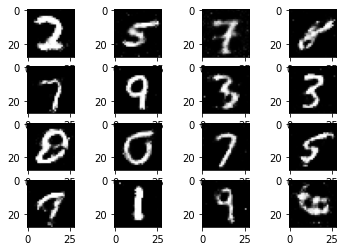

[34/200, 100/938] D_loss: 0.630 G_loss: 0.783
[34/200, 200/938] D_loss: 0.656 G_loss: 0.704
[34/200, 300/938] D_loss: 0.679 G_loss: 0.795
[34/200, 400/938] D_loss: 0.635 G_loss: 1.091
[34/200, 500/938] D_loss: 0.627 G_loss: 0.706
[34/200, 600/938] D_loss: 0.664 G_loss: 0.662
[34/200, 700/938] D_loss: 0.613 G_loss: 0.742
[34/200, 800/938] D_loss: 0.618 G_loss: 0.989
[34/200, 900/938] D_loss: 0.620 G_loss: 0.894
[34/200, 938/938] D_loss: 0.586 G_loss: 0.605


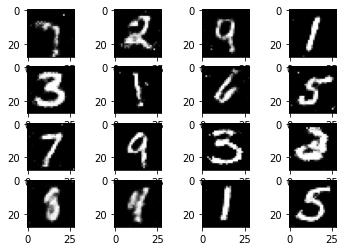

[35/200, 100/938] D_loss: 0.663 G_loss: 0.774
[35/200, 200/938] D_loss: 0.613 G_loss: 0.915
[35/200, 300/938] D_loss: 0.594 G_loss: 0.814
[35/200, 400/938] D_loss: 0.631 G_loss: 0.767
[35/200, 500/938] D_loss: 0.643 G_loss: 1.048
[35/200, 600/938] D_loss: 0.612 G_loss: 1.048
[35/200, 700/938] D_loss: 0.637 G_loss: 0.652
[35/200, 800/938] D_loss: 0.567 G_loss: 1.014
[35/200, 900/938] D_loss: 0.718 G_loss: 0.787
[35/200, 938/938] D_loss: 0.634 G_loss: 0.736


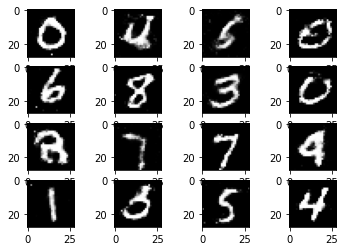

[36/200, 100/938] D_loss: 0.633 G_loss: 0.740
[36/200, 200/938] D_loss: 0.585 G_loss: 0.867
[36/200, 300/938] D_loss: 0.629 G_loss: 1.195
[36/200, 400/938] D_loss: 0.651 G_loss: 0.950
[36/200, 500/938] D_loss: 0.629 G_loss: 0.714
[36/200, 600/938] D_loss: 0.686 G_loss: 0.776
[36/200, 700/938] D_loss: 0.620 G_loss: 0.766
[36/200, 800/938] D_loss: 0.630 G_loss: 0.976
[36/200, 900/938] D_loss: 0.631 G_loss: 1.019
[36/200, 938/938] D_loss: 0.665 G_loss: 0.854


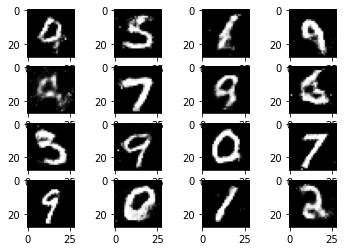

[37/200, 100/938] D_loss: 0.605 G_loss: 0.957
[37/200, 200/938] D_loss: 0.612 G_loss: 1.158
[37/200, 300/938] D_loss: 0.605 G_loss: 1.125
[37/200, 400/938] D_loss: 0.611 G_loss: 0.857
[37/200, 500/938] D_loss: 0.600 G_loss: 1.006
[37/200, 600/938] D_loss: 0.583 G_loss: 1.055
[37/200, 700/938] D_loss: 0.616 G_loss: 0.974
[37/200, 800/938] D_loss: 0.658 G_loss: 0.932
[37/200, 900/938] D_loss: 0.651 G_loss: 1.294
[37/200, 938/938] D_loss: 0.619 G_loss: 0.841


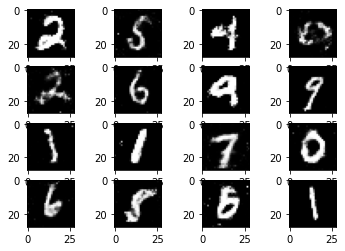

[38/200, 100/938] D_loss: 0.628 G_loss: 0.818
[38/200, 200/938] D_loss: 0.604 G_loss: 0.777
[38/200, 300/938] D_loss: 0.618 G_loss: 0.821
[38/200, 400/938] D_loss: 0.569 G_loss: 0.967
[38/200, 500/938] D_loss: 0.595 G_loss: 0.790
[38/200, 600/938] D_loss: 0.637 G_loss: 1.142
[38/200, 700/938] D_loss: 0.621 G_loss: 0.827
[38/200, 800/938] D_loss: 0.644 G_loss: 0.751
[38/200, 900/938] D_loss: 0.627 G_loss: 0.772
[38/200, 938/938] D_loss: 0.641 G_loss: 1.042


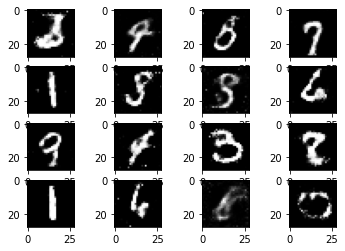

[39/200, 100/938] D_loss: 0.626 G_loss: 0.756
[39/200, 200/938] D_loss: 0.643 G_loss: 1.237
[39/200, 300/938] D_loss: 0.642 G_loss: 1.040
[39/200, 400/938] D_loss: 0.636 G_loss: 0.896
[39/200, 500/938] D_loss: 0.586 G_loss: 1.304
[39/200, 600/938] D_loss: 0.593 G_loss: 1.057
[39/200, 700/938] D_loss: 0.629 G_loss: 1.142
[39/200, 800/938] D_loss: 0.639 G_loss: 0.869
[39/200, 900/938] D_loss: 0.638 G_loss: 0.884
[39/200, 938/938] D_loss: 0.641 G_loss: 0.943


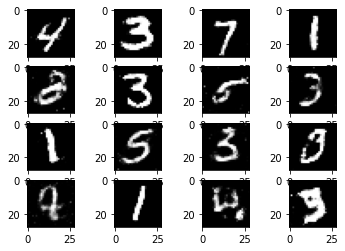

[40/200, 100/938] D_loss: 0.628 G_loss: 0.657
[40/200, 200/938] D_loss: 0.616 G_loss: 0.903
[40/200, 300/938] D_loss: 0.606 G_loss: 0.728
[40/200, 400/938] D_loss: 0.656 G_loss: 0.712
[40/200, 500/938] D_loss: 0.634 G_loss: 0.856
[40/200, 600/938] D_loss: 0.600 G_loss: 0.917
[40/200, 700/938] D_loss: 0.661 G_loss: 1.046
[40/200, 800/938] D_loss: 0.632 G_loss: 0.906
[40/200, 900/938] D_loss: 0.604 G_loss: 0.890
[40/200, 938/938] D_loss: 0.630 G_loss: 0.795


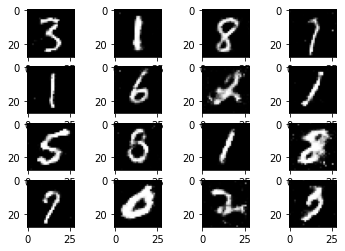

[41/200, 100/938] D_loss: 0.636 G_loss: 0.682
[41/200, 200/938] D_loss: 0.600 G_loss: 0.843
[41/200, 300/938] D_loss: 0.609 G_loss: 0.815
[41/200, 400/938] D_loss: 0.612 G_loss: 0.845
[41/200, 500/938] D_loss: 0.593 G_loss: 0.772
[41/200, 600/938] D_loss: 0.667 G_loss: 0.662
[41/200, 700/938] D_loss: 0.619 G_loss: 0.743
[41/200, 800/938] D_loss: 0.611 G_loss: 0.968
[41/200, 900/938] D_loss: 0.604 G_loss: 1.096
[41/200, 938/938] D_loss: 0.728 G_loss: 1.006


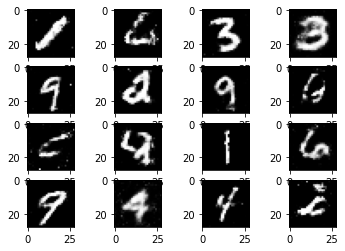

[42/200, 100/938] D_loss: 0.573 G_loss: 0.686
[42/200, 200/938] D_loss: 0.590 G_loss: 0.857
[42/200, 300/938] D_loss: 0.631 G_loss: 0.894
[42/200, 400/938] D_loss: 0.588 G_loss: 0.984
[42/200, 500/938] D_loss: 0.660 G_loss: 1.012
[42/200, 600/938] D_loss: 0.592 G_loss: 0.946
[42/200, 700/938] D_loss: 0.590 G_loss: 0.861
[42/200, 800/938] D_loss: 0.600 G_loss: 0.800
[42/200, 900/938] D_loss: 0.581 G_loss: 0.809
[42/200, 938/938] D_loss: 0.616 G_loss: 0.938


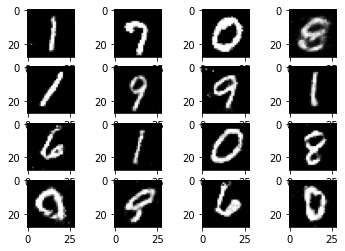

[43/200, 100/938] D_loss: 0.611 G_loss: 0.862
[43/200, 200/938] D_loss: 0.621 G_loss: 0.997
[43/200, 300/938] D_loss: 0.637 G_loss: 0.678
[43/200, 400/938] D_loss: 0.624 G_loss: 0.940
[43/200, 500/938] D_loss: 0.627 G_loss: 0.874
[43/200, 600/938] D_loss: 0.689 G_loss: 0.511
[43/200, 700/938] D_loss: 0.627 G_loss: 0.777
[43/200, 800/938] D_loss: 0.656 G_loss: 0.788
[43/200, 900/938] D_loss: 0.639 G_loss: 0.835
[43/200, 938/938] D_loss: 0.615 G_loss: 0.946


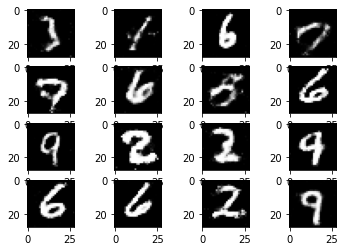

[44/200, 100/938] D_loss: 0.622 G_loss: 0.557
[44/200, 200/938] D_loss: 0.654 G_loss: 0.767
[44/200, 300/938] D_loss: 0.615 G_loss: 0.790
[44/200, 400/938] D_loss: 0.653 G_loss: 0.858
[44/200, 500/938] D_loss: 0.645 G_loss: 0.639
[44/200, 600/938] D_loss: 0.616 G_loss: 0.850
[44/200, 700/938] D_loss: 0.629 G_loss: 0.870
[44/200, 800/938] D_loss: 0.628 G_loss: 0.733
[44/200, 900/938] D_loss: 0.629 G_loss: 0.878
[44/200, 938/938] D_loss: 0.632 G_loss: 0.868


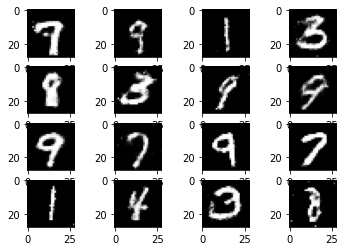

[45/200, 100/938] D_loss: 0.582 G_loss: 0.885
[45/200, 200/938] D_loss: 0.608 G_loss: 0.803
[45/200, 300/938] D_loss: 0.631 G_loss: 0.691
[45/200, 400/938] D_loss: 0.609 G_loss: 0.761
[45/200, 500/938] D_loss: 0.604 G_loss: 0.957
[45/200, 600/938] D_loss: 0.605 G_loss: 1.051
[45/200, 700/938] D_loss: 0.648 G_loss: 0.679
[45/200, 800/938] D_loss: 0.616 G_loss: 0.900
[45/200, 900/938] D_loss: 0.565 G_loss: 0.924
[45/200, 938/938] D_loss: 0.611 G_loss: 0.927


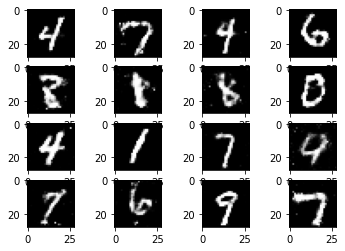

[46/200, 100/938] D_loss: 0.679 G_loss: 0.721
[46/200, 200/938] D_loss: 0.640 G_loss: 1.178
[46/200, 300/938] D_loss: 0.661 G_loss: 0.688
[46/200, 400/938] D_loss: 0.601 G_loss: 0.849
[46/200, 500/938] D_loss: 0.540 G_loss: 0.787
[46/200, 600/938] D_loss: 0.626 G_loss: 1.160
[46/200, 700/938] D_loss: 0.675 G_loss: 0.937
[46/200, 800/938] D_loss: 0.608 G_loss: 0.869
[46/200, 900/938] D_loss: 0.665 G_loss: 0.809
[46/200, 938/938] D_loss: 0.641 G_loss: 0.698


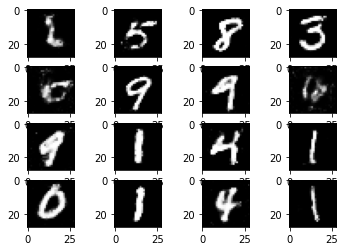

[47/200, 100/938] D_loss: 0.636 G_loss: 0.935
[47/200, 200/938] D_loss: 0.595 G_loss: 0.685
[47/200, 300/938] D_loss: 0.593 G_loss: 0.990
[47/200, 400/938] D_loss: 0.616 G_loss: 1.111
[47/200, 500/938] D_loss: 0.612 G_loss: 0.839
[47/200, 600/938] D_loss: 0.665 G_loss: 0.824
[47/200, 700/938] D_loss: 0.624 G_loss: 1.045
[47/200, 800/938] D_loss: 0.665 G_loss: 0.806
[47/200, 900/938] D_loss: 0.677 G_loss: 0.892
[47/200, 938/938] D_loss: 0.616 G_loss: 0.906


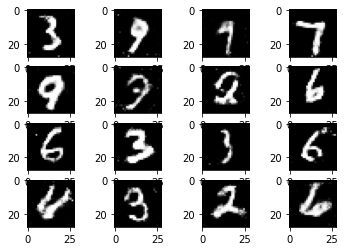

[48/200, 100/938] D_loss: 0.615 G_loss: 1.028
[48/200, 200/938] D_loss: 0.595 G_loss: 1.002
[48/200, 300/938] D_loss: 0.585 G_loss: 1.142
[48/200, 400/938] D_loss: 0.605 G_loss: 0.890
[48/200, 500/938] D_loss: 0.660 G_loss: 0.930
[48/200, 600/938] D_loss: 0.624 G_loss: 0.660
[48/200, 700/938] D_loss: 0.631 G_loss: 0.817
[48/200, 800/938] D_loss: 0.655 G_loss: 1.158
[48/200, 900/938] D_loss: 0.612 G_loss: 1.010
[48/200, 938/938] D_loss: 0.647 G_loss: 0.622


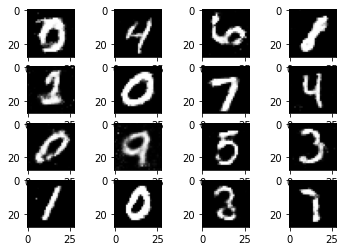

[49/200, 100/938] D_loss: 0.609 G_loss: 0.666
[49/200, 200/938] D_loss: 0.587 G_loss: 1.045
[49/200, 300/938] D_loss: 0.618 G_loss: 0.986
[49/200, 400/938] D_loss: 0.606 G_loss: 0.857
[49/200, 500/938] D_loss: 0.653 G_loss: 1.041
[49/200, 600/938] D_loss: 0.639 G_loss: 0.844
[49/200, 700/938] D_loss: 0.656 G_loss: 0.943
[49/200, 800/938] D_loss: 0.589 G_loss: 1.033
[49/200, 900/938] D_loss: 0.624 G_loss: 0.735
[49/200, 938/938] D_loss: 0.675 G_loss: 1.234


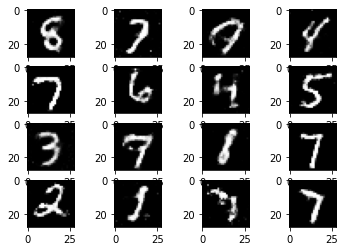

[50/200, 100/938] D_loss: 0.617 G_loss: 0.993
[50/200, 200/938] D_loss: 0.611 G_loss: 0.849
[50/200, 300/938] D_loss: 0.641 G_loss: 0.757
[50/200, 400/938] D_loss: 0.614 G_loss: 0.901
[50/200, 500/938] D_loss: 0.660 G_loss: 0.805
[50/200, 600/938] D_loss: 0.642 G_loss: 1.211
[50/200, 700/938] D_loss: 0.658 G_loss: 1.010
[50/200, 800/938] D_loss: 0.641 G_loss: 0.695
[50/200, 900/938] D_loss: 0.569 G_loss: 0.781
[50/200, 938/938] D_loss: 0.651 G_loss: 0.877


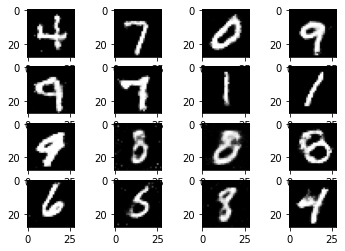

C:\Project_Files\Anaconda3\envs\01-pytorch-basics\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Model saved.
[51/200, 100/938] D_loss: 0.603 G_loss: 0.885
[51/200, 200/938] D_loss: 0.715 G_loss: 1.078
[51/200, 300/938] D_loss: 0.635 G_loss: 1.051
[51/200, 400/938] D_loss: 0.644 G_loss: 1.128
[51/200, 500/938] D_loss: 0.595 G_loss: 1.051
[51/200, 600/938] D_loss: 0.591 G_loss: 0.924
[51/200, 700/938] D_loss: 0.684 G_loss: 0.605
[51/200, 800/938] D_loss: 0.649 G_loss: 0.975
[51/200, 900/938] D_loss: 0.629 G_loss: 0.883
[51/200, 938/938] D_loss: 0.685 G_loss: 0.880


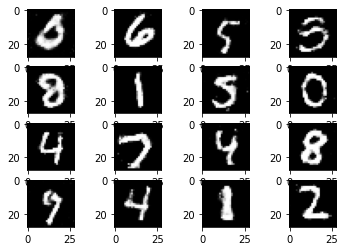

[52/200, 100/938] D_loss: 0.575 G_loss: 0.939
[52/200, 200/938] D_loss: 0.609 G_loss: 1.204
[52/200, 300/938] D_loss: 0.603 G_loss: 0.665
[52/200, 400/938] D_loss: 0.680 G_loss: 1.069
[52/200, 500/938] D_loss: 0.645 G_loss: 0.936
[52/200, 600/938] D_loss: 0.658 G_loss: 0.904
[52/200, 700/938] D_loss: 0.633 G_loss: 0.855
[52/200, 800/938] D_loss: 0.646 G_loss: 1.017
[52/200, 900/938] D_loss: 0.636 G_loss: 1.066
[52/200, 938/938] D_loss: 0.634 G_loss: 1.084


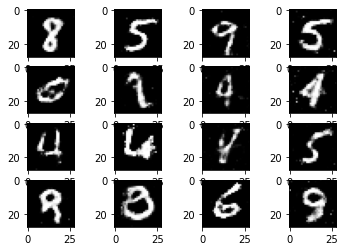

[53/200, 100/938] D_loss: 0.620 G_loss: 0.868
[53/200, 200/938] D_loss: 0.632 G_loss: 0.880
[53/200, 300/938] D_loss: 0.629 G_loss: 0.651
[53/200, 400/938] D_loss: 0.614 G_loss: 1.066
[53/200, 500/938] D_loss: 0.592 G_loss: 0.828
[53/200, 600/938] D_loss: 0.640 G_loss: 0.772
[53/200, 700/938] D_loss: 0.596 G_loss: 0.990
[53/200, 800/938] D_loss: 0.593 G_loss: 1.032
[53/200, 900/938] D_loss: 0.587 G_loss: 1.139
[53/200, 938/938] D_loss: 0.657 G_loss: 0.906


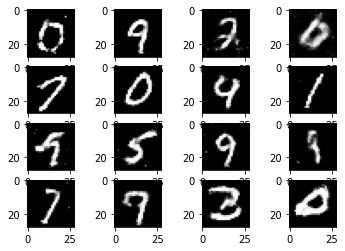

[54/200, 100/938] D_loss: 0.621 G_loss: 0.857
[54/200, 200/938] D_loss: 0.601 G_loss: 0.774
[54/200, 300/938] D_loss: 0.613 G_loss: 1.049
[54/200, 400/938] D_loss: 0.673 G_loss: 1.028
[54/200, 500/938] D_loss: 0.605 G_loss: 0.878
[54/200, 600/938] D_loss: 0.624 G_loss: 0.936
[54/200, 700/938] D_loss: 0.674 G_loss: 0.723
[54/200, 800/938] D_loss: 0.641 G_loss: 0.862
[54/200, 900/938] D_loss: 0.603 G_loss: 1.112
[54/200, 938/938] D_loss: 0.679 G_loss: 1.229


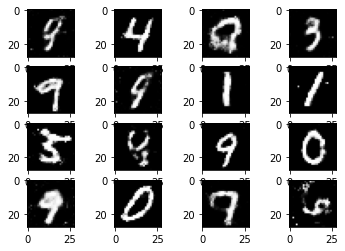

[55/200, 100/938] D_loss: 0.621 G_loss: 1.005
[55/200, 200/938] D_loss: 0.677 G_loss: 0.638
[55/200, 300/938] D_loss: 0.605 G_loss: 0.598
[55/200, 400/938] D_loss: 0.610 G_loss: 1.017
[55/200, 500/938] D_loss: 0.659 G_loss: 0.911
[55/200, 600/938] D_loss: 0.639 G_loss: 0.792
[55/200, 700/938] D_loss: 0.650 G_loss: 1.028
[55/200, 800/938] D_loss: 0.578 G_loss: 0.918
[55/200, 900/938] D_loss: 0.624 G_loss: 0.839
[55/200, 938/938] D_loss: 0.659 G_loss: 0.697


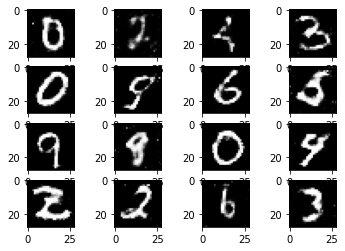

[56/200, 100/938] D_loss: 0.630 G_loss: 0.875
[56/200, 200/938] D_loss: 0.609 G_loss: 1.014
[56/200, 300/938] D_loss: 0.638 G_loss: 0.735
[56/200, 400/938] D_loss: 0.647 G_loss: 0.964
[56/200, 500/938] D_loss: 0.611 G_loss: 0.922
[56/200, 600/938] D_loss: 0.627 G_loss: 1.119
[56/200, 700/938] D_loss: 0.562 G_loss: 0.832
[56/200, 800/938] D_loss: 0.654 G_loss: 0.706
[56/200, 900/938] D_loss: 0.672 G_loss: 0.898
[56/200, 938/938] D_loss: 0.612 G_loss: 0.631


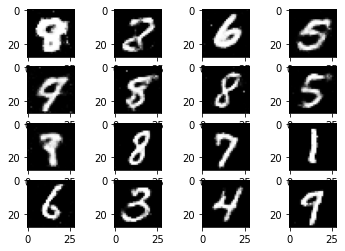

[57/200, 100/938] D_loss: 0.626 G_loss: 0.881
[57/200, 200/938] D_loss: 0.586 G_loss: 0.824
[57/200, 300/938] D_loss: 0.592 G_loss: 0.701
[57/200, 400/938] D_loss: 0.620 G_loss: 0.879
[57/200, 500/938] D_loss: 0.619 G_loss: 0.989
[57/200, 600/938] D_loss: 0.631 G_loss: 1.035
[57/200, 700/938] D_loss: 0.617 G_loss: 0.769
[57/200, 800/938] D_loss: 0.703 G_loss: 0.902
[57/200, 900/938] D_loss: 0.692 G_loss: 0.692
[57/200, 938/938] D_loss: 0.669 G_loss: 1.117


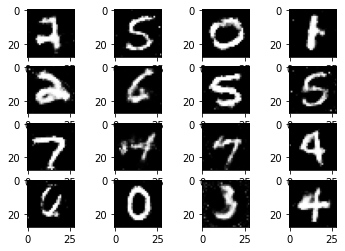

[58/200, 100/938] D_loss: 0.655 G_loss: 0.944
[58/200, 200/938] D_loss: 0.617 G_loss: 1.184
[58/200, 300/938] D_loss: 0.605 G_loss: 0.926
[58/200, 400/938] D_loss: 0.648 G_loss: 0.839
[58/200, 500/938] D_loss: 0.691 G_loss: 0.706
[58/200, 600/938] D_loss: 0.626 G_loss: 0.744
[58/200, 700/938] D_loss: 0.696 G_loss: 1.148
[58/200, 800/938] D_loss: 0.626 G_loss: 1.120
[58/200, 900/938] D_loss: 0.620 G_loss: 1.015
[58/200, 938/938] D_loss: 0.634 G_loss: 1.010


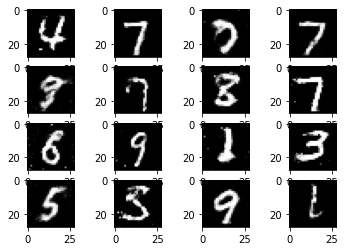

[59/200, 100/938] D_loss: 0.622 G_loss: 1.068
[59/200, 200/938] D_loss: 0.634 G_loss: 0.993
[59/200, 300/938] D_loss: 0.639 G_loss: 0.751
[59/200, 400/938] D_loss: 0.615 G_loss: 1.142
[59/200, 500/938] D_loss: 0.615 G_loss: 0.814
[59/200, 600/938] D_loss: 0.644 G_loss: 0.884
[59/200, 700/938] D_loss: 0.567 G_loss: 1.134
[59/200, 800/938] D_loss: 0.638 G_loss: 0.764
[59/200, 900/938] D_loss: 0.685 G_loss: 0.948
[59/200, 938/938] D_loss: 0.637 G_loss: 0.938


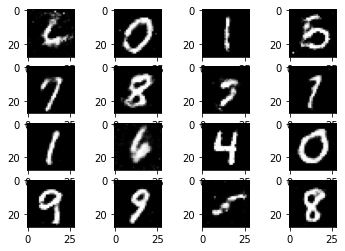

[60/200, 100/938] D_loss: 0.636 G_loss: 0.888
[60/200, 200/938] D_loss: 0.649 G_loss: 1.011
[60/200, 300/938] D_loss: 0.612 G_loss: 0.969
[60/200, 400/938] D_loss: 0.647 G_loss: 0.974
[60/200, 500/938] D_loss: 0.653 G_loss: 0.638
[60/200, 600/938] D_loss: 0.671 G_loss: 0.848
[60/200, 700/938] D_loss: 0.614 G_loss: 0.862
[60/200, 800/938] D_loss: 0.610 G_loss: 0.854
[60/200, 900/938] D_loss: 0.634 G_loss: 0.803
[60/200, 938/938] D_loss: 0.648 G_loss: 1.166


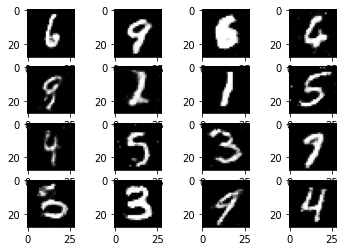

[61/200, 100/938] D_loss: 0.658 G_loss: 0.996
[61/200, 200/938] D_loss: 0.625 G_loss: 0.776
[61/200, 300/938] D_loss: 0.590 G_loss: 1.034
[61/200, 400/938] D_loss: 0.628 G_loss: 0.944
[61/200, 500/938] D_loss: 0.617 G_loss: 0.877
[61/200, 600/938] D_loss: 0.616 G_loss: 0.795
[61/200, 700/938] D_loss: 0.643 G_loss: 1.118
[61/200, 800/938] D_loss: 0.622 G_loss: 0.974
[61/200, 900/938] D_loss: 0.647 G_loss: 0.975
[61/200, 938/938] D_loss: 0.574 G_loss: 0.922


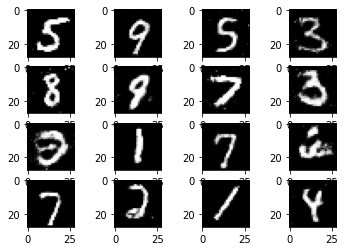

[62/200, 100/938] D_loss: 0.622 G_loss: 0.923
[62/200, 200/938] D_loss: 0.653 G_loss: 1.178
[62/200, 300/938] D_loss: 0.663 G_loss: 0.836
[62/200, 400/938] D_loss: 0.642 G_loss: 0.951
[62/200, 500/938] D_loss: 0.649 G_loss: 1.150
[62/200, 600/938] D_loss: 0.679 G_loss: 0.677
[62/200, 700/938] D_loss: 0.594 G_loss: 0.913
[62/200, 800/938] D_loss: 0.707 G_loss: 1.002
[62/200, 900/938] D_loss: 0.584 G_loss: 0.960
[62/200, 938/938] D_loss: 0.674 G_loss: 0.790


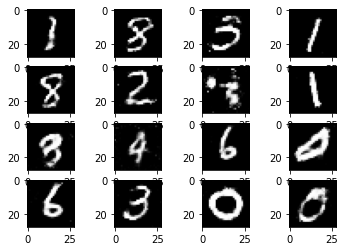

[63/200, 100/938] D_loss: 0.616 G_loss: 0.897
[63/200, 200/938] D_loss: 0.655 G_loss: 0.811
[63/200, 300/938] D_loss: 0.631 G_loss: 0.851
[63/200, 400/938] D_loss: 0.608 G_loss: 0.989
[63/200, 500/938] D_loss: 0.654 G_loss: 0.681
[63/200, 600/938] D_loss: 0.636 G_loss: 0.787
[63/200, 700/938] D_loss: 0.632 G_loss: 0.939
[63/200, 800/938] D_loss: 0.640 G_loss: 0.984
[63/200, 900/938] D_loss: 0.625 G_loss: 0.708
[63/200, 938/938] D_loss: 0.559 G_loss: 1.018


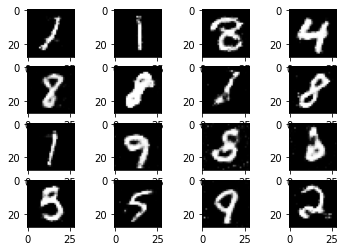

[64/200, 100/938] D_loss: 0.664 G_loss: 0.649
[64/200, 200/938] D_loss: 0.637 G_loss: 0.541
[64/200, 300/938] D_loss: 0.641 G_loss: 0.795
[64/200, 400/938] D_loss: 0.634 G_loss: 1.004
[64/200, 500/938] D_loss: 0.628 G_loss: 0.966
[64/200, 600/938] D_loss: 0.601 G_loss: 1.028
[64/200, 700/938] D_loss: 0.669 G_loss: 0.952
[64/200, 800/938] D_loss: 0.628 G_loss: 0.973
[64/200, 900/938] D_loss: 0.648 G_loss: 1.033
[64/200, 938/938] D_loss: 0.595 G_loss: 0.643


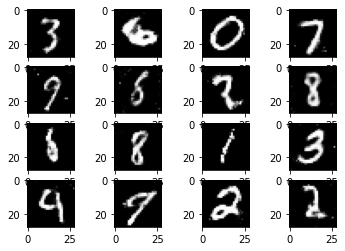

[65/200, 100/938] D_loss: 0.636 G_loss: 0.919
[65/200, 200/938] D_loss: 0.654 G_loss: 1.090
[65/200, 300/938] D_loss: 0.676 G_loss: 1.031
[65/200, 400/938] D_loss: 0.642 G_loss: 0.803
[65/200, 500/938] D_loss: 0.612 G_loss: 0.858
[65/200, 600/938] D_loss: 0.669 G_loss: 0.969
[65/200, 700/938] D_loss: 0.702 G_loss: 0.980
[65/200, 800/938] D_loss: 0.686 G_loss: 0.914
[65/200, 900/938] D_loss: 0.628 G_loss: 0.767
[65/200, 938/938] D_loss: 0.616 G_loss: 0.917


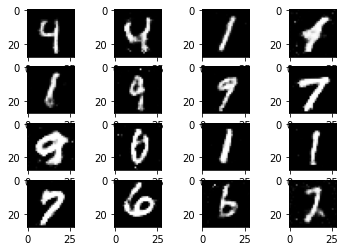

[66/200, 100/938] D_loss: 0.586 G_loss: 0.968
[66/200, 200/938] D_loss: 0.575 G_loss: 0.802
[66/200, 300/938] D_loss: 0.557 G_loss: 0.846
[66/200, 400/938] D_loss: 0.611 G_loss: 1.157
[66/200, 500/938] D_loss: 0.604 G_loss: 1.043
[66/200, 600/938] D_loss: 0.602 G_loss: 0.790
[66/200, 700/938] D_loss: 0.592 G_loss: 0.928
[66/200, 800/938] D_loss: 0.605 G_loss: 1.027
[66/200, 900/938] D_loss: 0.626 G_loss: 0.880
[66/200, 938/938] D_loss: 0.583 G_loss: 0.688


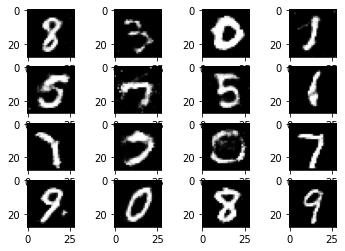

[67/200, 100/938] D_loss: 0.583 G_loss: 0.928
[67/200, 200/938] D_loss: 0.603 G_loss: 0.916
[67/200, 300/938] D_loss: 0.592 G_loss: 0.971
[67/200, 400/938] D_loss: 0.622 G_loss: 1.101
[67/200, 500/938] D_loss: 0.594 G_loss: 0.796
[67/200, 600/938] D_loss: 0.638 G_loss: 0.870
[67/200, 700/938] D_loss: 0.636 G_loss: 0.865
[67/200, 800/938] D_loss: 0.625 G_loss: 0.945
[67/200, 900/938] D_loss: 0.624 G_loss: 0.883
[67/200, 938/938] D_loss: 0.647 G_loss: 0.847


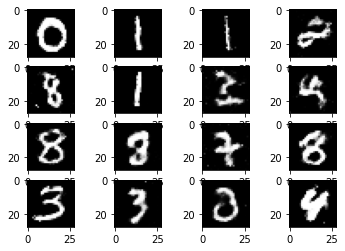

[68/200, 100/938] D_loss: 0.626 G_loss: 0.683
[68/200, 200/938] D_loss: 0.601 G_loss: 0.847
[68/200, 300/938] D_loss: 0.574 G_loss: 0.816
[68/200, 400/938] D_loss: 0.580 G_loss: 0.966
[68/200, 500/938] D_loss: 0.643 G_loss: 1.207
[68/200, 600/938] D_loss: 0.609 G_loss: 0.948
[68/200, 700/938] D_loss: 0.672 G_loss: 0.994
[68/200, 800/938] D_loss: 0.646 G_loss: 0.872
[68/200, 900/938] D_loss: 0.645 G_loss: 0.807
[68/200, 938/938] D_loss: 0.636 G_loss: 0.838


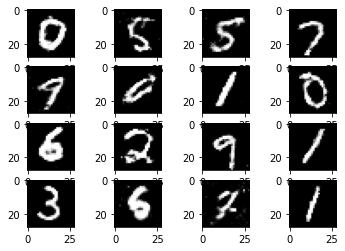

[69/200, 100/938] D_loss: 0.641 G_loss: 0.906
[69/200, 200/938] D_loss: 0.590 G_loss: 0.740
[69/200, 300/938] D_loss: 0.662 G_loss: 0.971
[69/200, 400/938] D_loss: 0.695 G_loss: 1.464
[69/200, 500/938] D_loss: 0.656 G_loss: 0.979
[69/200, 600/938] D_loss: 0.679 G_loss: 0.906
[69/200, 700/938] D_loss: 0.702 G_loss: 1.017
[69/200, 800/938] D_loss: 0.652 G_loss: 0.942
[69/200, 900/938] D_loss: 0.673 G_loss: 0.918
[69/200, 938/938] D_loss: 0.599 G_loss: 0.815


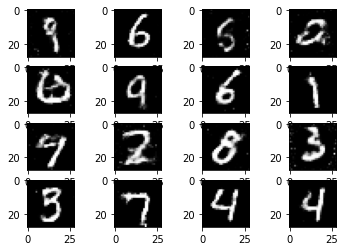

[70/200, 100/938] D_loss: 0.644 G_loss: 0.812
[70/200, 200/938] D_loss: 0.599 G_loss: 1.148
[70/200, 300/938] D_loss: 0.611 G_loss: 0.940
[70/200, 400/938] D_loss: 0.650 G_loss: 0.947
[70/200, 500/938] D_loss: 0.647 G_loss: 0.910
[70/200, 600/938] D_loss: 0.682 G_loss: 1.021
[70/200, 700/938] D_loss: 0.625 G_loss: 0.942
[70/200, 800/938] D_loss: 0.696 G_loss: 0.751
[70/200, 900/938] D_loss: 0.582 G_loss: 0.927
[70/200, 938/938] D_loss: 0.616 G_loss: 0.742


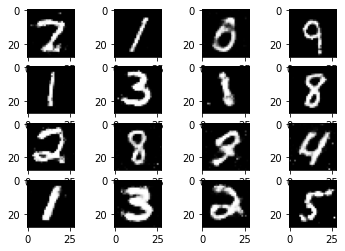

[71/200, 100/938] D_loss: 0.632 G_loss: 1.176
[71/200, 200/938] D_loss: 0.626 G_loss: 0.793
[71/200, 300/938] D_loss: 0.655 G_loss: 0.839
[71/200, 400/938] D_loss: 0.641 G_loss: 1.030
[71/200, 500/938] D_loss: 0.668 G_loss: 1.158
[71/200, 600/938] D_loss: 0.608 G_loss: 0.799
[71/200, 700/938] D_loss: 0.674 G_loss: 0.932
[71/200, 800/938] D_loss: 0.594 G_loss: 0.902
[71/200, 900/938] D_loss: 0.616 G_loss: 1.076
[71/200, 938/938] D_loss: 0.655 G_loss: 0.995


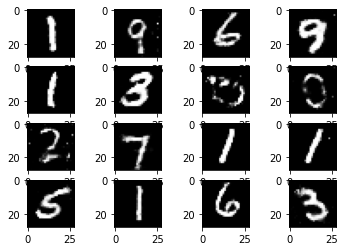

[72/200, 100/938] D_loss: 0.658 G_loss: 0.747
[72/200, 200/938] D_loss: 0.587 G_loss: 1.005
[72/200, 300/938] D_loss: 0.645 G_loss: 1.206
[72/200, 400/938] D_loss: 0.596 G_loss: 0.971
[72/200, 500/938] D_loss: 0.626 G_loss: 0.949
[72/200, 600/938] D_loss: 0.627 G_loss: 0.818
[72/200, 700/938] D_loss: 0.611 G_loss: 1.006
[72/200, 800/938] D_loss: 0.613 G_loss: 0.888
[72/200, 900/938] D_loss: 0.676 G_loss: 0.923
[72/200, 938/938] D_loss: 0.629 G_loss: 0.826


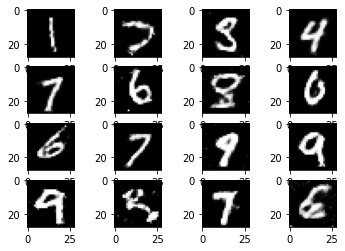

[73/200, 100/938] D_loss: 0.609 G_loss: 0.917
[73/200, 200/938] D_loss: 0.622 G_loss: 0.879
[73/200, 300/938] D_loss: 0.665 G_loss: 0.836
[73/200, 400/938] D_loss: 0.637 G_loss: 0.934
[73/200, 500/938] D_loss: 0.603 G_loss: 0.806
[73/200, 600/938] D_loss: 0.681 G_loss: 1.017
[73/200, 700/938] D_loss: 0.574 G_loss: 0.832
[73/200, 800/938] D_loss: 0.587 G_loss: 0.815
[73/200, 900/938] D_loss: 0.634 G_loss: 0.969
[73/200, 938/938] D_loss: 0.572 G_loss: 0.945


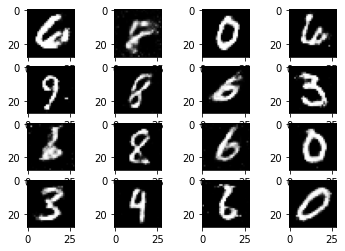

[74/200, 100/938] D_loss: 0.668 G_loss: 0.973
[74/200, 200/938] D_loss: 0.643 G_loss: 0.792
[74/200, 300/938] D_loss: 0.626 G_loss: 1.058
[74/200, 400/938] D_loss: 0.644 G_loss: 0.778
[74/200, 500/938] D_loss: 0.657 G_loss: 0.849
[74/200, 600/938] D_loss: 0.596 G_loss: 0.807
[74/200, 700/938] D_loss: 0.594 G_loss: 1.007
[74/200, 800/938] D_loss: 0.632 G_loss: 0.794
[74/200, 900/938] D_loss: 0.651 G_loss: 0.964
[74/200, 938/938] D_loss: 0.676 G_loss: 0.730


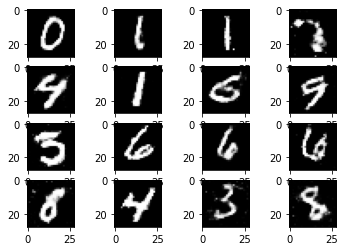

[75/200, 100/938] D_loss: 0.620 G_loss: 0.747
[75/200, 200/938] D_loss: 0.631 G_loss: 1.068
[75/200, 300/938] D_loss: 0.619 G_loss: 1.051
[75/200, 400/938] D_loss: 0.642 G_loss: 0.939
[75/200, 500/938] D_loss: 0.634 G_loss: 1.021
[75/200, 600/938] D_loss: 0.608 G_loss: 0.907
[75/200, 700/938] D_loss: 0.623 G_loss: 0.976
[75/200, 800/938] D_loss: 0.630 G_loss: 0.818
[75/200, 900/938] D_loss: 0.578 G_loss: 0.770
[75/200, 938/938] D_loss: 0.640 G_loss: 1.030


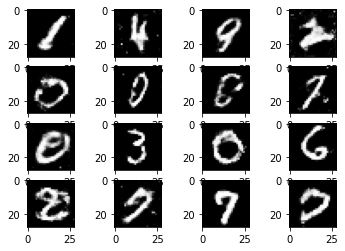

[76/200, 100/938] D_loss: 0.621 G_loss: 0.984
[76/200, 200/938] D_loss: 0.626 G_loss: 0.938
[76/200, 300/938] D_loss: 0.672 G_loss: 0.707
[76/200, 400/938] D_loss: 0.635 G_loss: 1.090
[76/200, 500/938] D_loss: 0.649 G_loss: 0.750
[76/200, 600/938] D_loss: 0.682 G_loss: 1.167
[76/200, 700/938] D_loss: 0.581 G_loss: 0.828
[76/200, 800/938] D_loss: 0.674 G_loss: 0.798
[76/200, 900/938] D_loss: 0.622 G_loss: 0.873
[76/200, 938/938] D_loss: 0.686 G_loss: 1.029


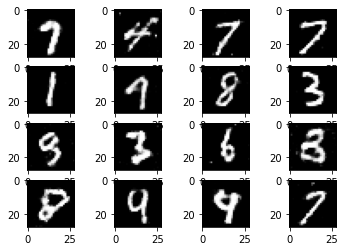

[77/200, 100/938] D_loss: 0.639 G_loss: 0.924
[77/200, 200/938] D_loss: 0.600 G_loss: 0.969
[77/200, 300/938] D_loss: 0.641 G_loss: 1.233
[77/200, 400/938] D_loss: 0.641 G_loss: 1.027
[77/200, 500/938] D_loss: 0.626 G_loss: 0.891
[77/200, 600/938] D_loss: 0.619 G_loss: 0.810
[77/200, 700/938] D_loss: 0.629 G_loss: 0.907
[77/200, 800/938] D_loss: 0.667 G_loss: 0.846
[77/200, 900/938] D_loss: 0.659 G_loss: 0.871
[77/200, 938/938] D_loss: 0.569 G_loss: 1.022


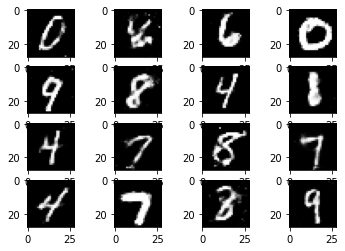

[78/200, 100/938] D_loss: 0.616 G_loss: 0.831
[78/200, 200/938] D_loss: 0.647 G_loss: 0.836
[78/200, 300/938] D_loss: 0.593 G_loss: 1.099
[78/200, 400/938] D_loss: 0.602 G_loss: 0.966
[78/200, 500/938] D_loss: 0.662 G_loss: 0.862
[78/200, 600/938] D_loss: 0.640 G_loss: 0.885
[78/200, 700/938] D_loss: 0.689 G_loss: 0.837
[78/200, 800/938] D_loss: 0.641 G_loss: 1.106
[78/200, 900/938] D_loss: 0.601 G_loss: 0.903
[78/200, 938/938] D_loss: 0.626 G_loss: 0.782


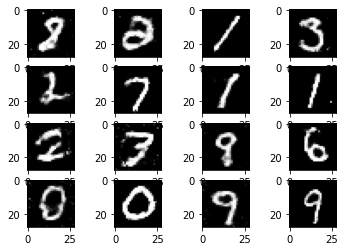

[79/200, 100/938] D_loss: 0.624 G_loss: 0.921
[79/200, 200/938] D_loss: 0.640 G_loss: 0.755
[79/200, 300/938] D_loss: 0.574 G_loss: 0.956
[79/200, 400/938] D_loss: 0.627 G_loss: 1.018
[79/200, 500/938] D_loss: 0.618 G_loss: 0.771
[79/200, 600/938] D_loss: 0.643 G_loss: 0.875
[79/200, 700/938] D_loss: 0.579 G_loss: 0.910
[79/200, 800/938] D_loss: 0.631 G_loss: 0.987
[79/200, 900/938] D_loss: 0.593 G_loss: 1.085
[79/200, 938/938] D_loss: 0.583 G_loss: 0.770


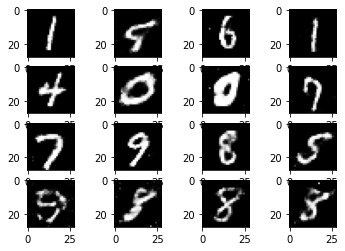

[80/200, 100/938] D_loss: 0.619 G_loss: 0.785
[80/200, 200/938] D_loss: 0.589 G_loss: 1.034
[80/200, 300/938] D_loss: 0.596 G_loss: 1.079
[80/200, 400/938] D_loss: 0.666 G_loss: 1.123
[80/200, 500/938] D_loss: 0.638 G_loss: 0.961
[80/200, 600/938] D_loss: 0.603 G_loss: 0.782
[80/200, 700/938] D_loss: 0.619 G_loss: 0.967
[80/200, 800/938] D_loss: 0.597 G_loss: 0.672
[80/200, 900/938] D_loss: 0.651 G_loss: 0.876
[80/200, 938/938] D_loss: 0.620 G_loss: 0.927


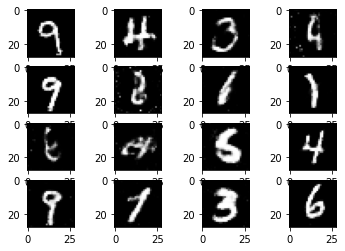

[81/200, 100/938] D_loss: 0.636 G_loss: 0.918
[81/200, 200/938] D_loss: 0.618 G_loss: 0.836
[81/200, 300/938] D_loss: 0.659 G_loss: 1.000
[81/200, 400/938] D_loss: 0.670 G_loss: 0.856
[81/200, 500/938] D_loss: 0.597 G_loss: 0.777
[81/200, 600/938] D_loss: 0.663 G_loss: 0.894
[81/200, 700/938] D_loss: 0.612 G_loss: 0.862
[81/200, 800/938] D_loss: 0.596 G_loss: 0.959
[81/200, 900/938] D_loss: 0.599 G_loss: 0.901
[81/200, 938/938] D_loss: 0.633 G_loss: 0.786


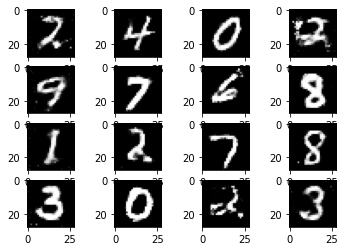

[82/200, 100/938] D_loss: 0.645 G_loss: 0.986
[82/200, 200/938] D_loss: 0.576 G_loss: 0.905
[82/200, 300/938] D_loss: 0.636 G_loss: 0.851
[82/200, 400/938] D_loss: 0.629 G_loss: 0.982
[82/200, 500/938] D_loss: 0.605 G_loss: 0.673
[82/200, 600/938] D_loss: 0.608 G_loss: 0.844
[82/200, 700/938] D_loss: 0.658 G_loss: 0.940
[82/200, 800/938] D_loss: 0.699 G_loss: 0.698
[82/200, 900/938] D_loss: 0.651 G_loss: 0.916
[82/200, 938/938] D_loss: 0.636 G_loss: 1.156


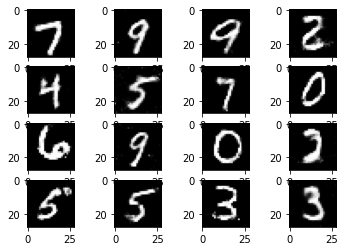

[83/200, 100/938] D_loss: 0.599 G_loss: 0.800
[83/200, 200/938] D_loss: 0.668 G_loss: 1.102
[83/200, 300/938] D_loss: 0.652 G_loss: 0.919
[83/200, 400/938] D_loss: 0.600 G_loss: 0.642
[83/200, 500/938] D_loss: 0.624 G_loss: 0.795
[83/200, 600/938] D_loss: 0.617 G_loss: 0.762
[83/200, 700/938] D_loss: 0.629 G_loss: 0.932
[83/200, 800/938] D_loss: 0.591 G_loss: 0.848
[83/200, 900/938] D_loss: 0.607 G_loss: 0.710
[83/200, 938/938] D_loss: 0.583 G_loss: 1.225


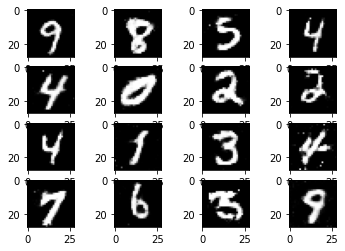

[84/200, 100/938] D_loss: 0.688 G_loss: 0.720
[84/200, 200/938] D_loss: 0.669 G_loss: 0.935
[84/200, 300/938] D_loss: 0.609 G_loss: 1.070
[84/200, 400/938] D_loss: 0.640 G_loss: 0.965
[84/200, 500/938] D_loss: 0.621 G_loss: 1.137
[84/200, 600/938] D_loss: 0.567 G_loss: 0.936
[84/200, 700/938] D_loss: 0.659 G_loss: 0.784
[84/200, 800/938] D_loss: 0.644 G_loss: 0.818
[84/200, 900/938] D_loss: 0.643 G_loss: 0.905
[84/200, 938/938] D_loss: 0.721 G_loss: 1.144


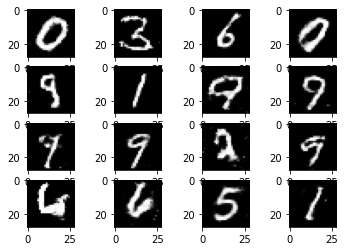

[85/200, 100/938] D_loss: 0.632 G_loss: 1.028
[85/200, 200/938] D_loss: 0.612 G_loss: 0.791
[85/200, 300/938] D_loss: 0.639 G_loss: 1.055
[85/200, 400/938] D_loss: 0.616 G_loss: 0.841
[85/200, 500/938] D_loss: 0.610 G_loss: 1.080
[85/200, 600/938] D_loss: 0.641 G_loss: 0.798
[85/200, 700/938] D_loss: 0.614 G_loss: 1.066
[85/200, 800/938] D_loss: 0.617 G_loss: 0.759
[85/200, 900/938] D_loss: 0.626 G_loss: 0.798
[85/200, 938/938] D_loss: 0.613 G_loss: 0.876


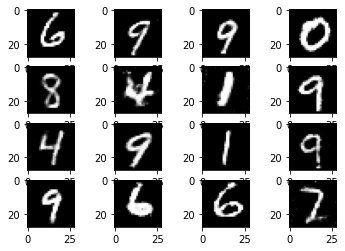

[86/200, 100/938] D_loss: 0.577 G_loss: 1.010
[86/200, 200/938] D_loss: 0.543 G_loss: 0.860
[86/200, 300/938] D_loss: 0.623 G_loss: 0.702
[86/200, 400/938] D_loss: 0.625 G_loss: 0.934
[86/200, 500/938] D_loss: 0.573 G_loss: 1.023
[86/200, 600/938] D_loss: 0.644 G_loss: 0.957
[86/200, 700/938] D_loss: 0.624 G_loss: 0.785
[86/200, 800/938] D_loss: 0.620 G_loss: 0.896
[86/200, 900/938] D_loss: 0.631 G_loss: 0.827
[86/200, 938/938] D_loss: 0.636 G_loss: 1.206


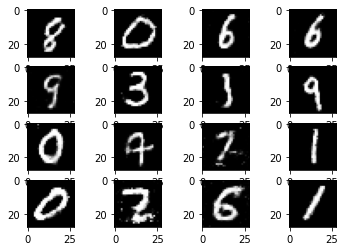

[87/200, 100/938] D_loss: 0.662 G_loss: 0.552
[87/200, 200/938] D_loss: 0.682 G_loss: 1.019
[87/200, 300/938] D_loss: 0.660 G_loss: 0.839
[87/200, 400/938] D_loss: 0.611 G_loss: 0.921
[87/200, 500/938] D_loss: 0.591 G_loss: 0.945


KeyboardInterrupt: 

In [40]:
# Train
for epoch in range(epochs):
    epoch += 1

    for times, data in enumerate(train_loader):
        times += 1
        real_inputs = data[0].to(device)
        test = 255 * (0.5 * real_inputs[0] + 0.5)

        real_inputs = real_inputs.view(-1, 784)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        # Zero the parameter gradients
        d_optimizer.zero_grad()

        # Backward propagation
        d_loss = d_loss_function(outputs, targets)
        d_loss.backward()
        d_optimizer.step()

        # Generator
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)

        g_loss = g_loss_function(fake_outputs)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if times % 100 == 0 or times == len(train_loader):
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_loader), d_loss.item(), g_loss.item()))

    imgs_numpy = (fake_inputs.data.cpu().numpy()+1.0)/2.0
    show_images(imgs_numpy[:16])
    plt.show()

    if epoch % 50 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')
